In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.data.path.append(r"C:\Users\Sooraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk")


In [3]:
# Load positive words
with open('C:/Users/Sooraj/Downloads/positive-words.txt', 'r') as file:
    positive_words = set(file.read().splitlines())

In [4]:
# Load negative words
with open('C:/Users/Sooraj/Downloads/negative-words.txt', 'r') as file:
    negative_words = set(file.read().splitlines())

In [5]:
# Load stop words
with open('C:/Users/Sooraj/Downloads/stop.txt', 'r') as file:
    stop_words = set(file.read().splitlines())

In [6]:
# Load Elon Musk's tweets from the CSV file
df = pd.read_csv('C:/Users/Sooraj/Downloads/Elon_musk.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
# Function to perform sentiment analysis on a text
def analyze_sentiment(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Calculate positive and negative scores
    positive_score = sum(1 for word in filtered_tokens if word in positive_words)
    negative_score = sum(1 for word in filtered_tokens if word in negative_words)

    # Determine sentiment based on scores
    if positive_score > negative_score:
        return 'Positive'
    elif positive_score < negative_score:
        return 'Negative'
    else:
        return 'Neutral'


In [8]:
# Apply sentiment analysis to each tweet in the DataFrame
df['Sentiment'] = df['Text'].apply(analyze_sentiment)

In [9]:
# Display the DataFrame with the sentiment analysis results
print(df[['Text', 'Sentiment']])

                                                   Text Sentiment
0                                @kunalb11 Im an alien   Neutral
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
2                   @joerogan @Spotify Great interview!  Positive
3                       @gtera27 Doge is underestimated   Neutral
4     @teslacn Congratulations Tesla China for amazi...  Positive
...                                                 ...       ...
1994  @flcnhvy True, it sounds so surreal, but the n...   Neutral
1995  @PPathole Make sure to read ur terms &amp; con...   Neutral
1996                @TeslaGong @PPathole Samwise Gamgee   Neutral
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  Negative
1998                          Progress update August 28  Positive

[1999 rows x 2 columns]


In [10]:
# Count the number of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Display the counts
print(sentiment_counts)

Neutral     1276
Positive     477
Negative     246
Name: Sentiment, dtype: int64


# Observation
## Overall tweets are Neutral and 25% is positive whereas 12% in negative

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

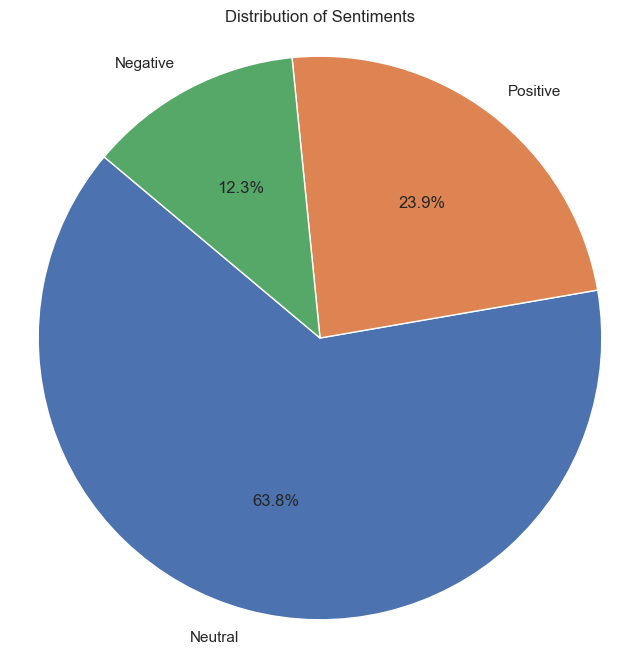

In [12]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

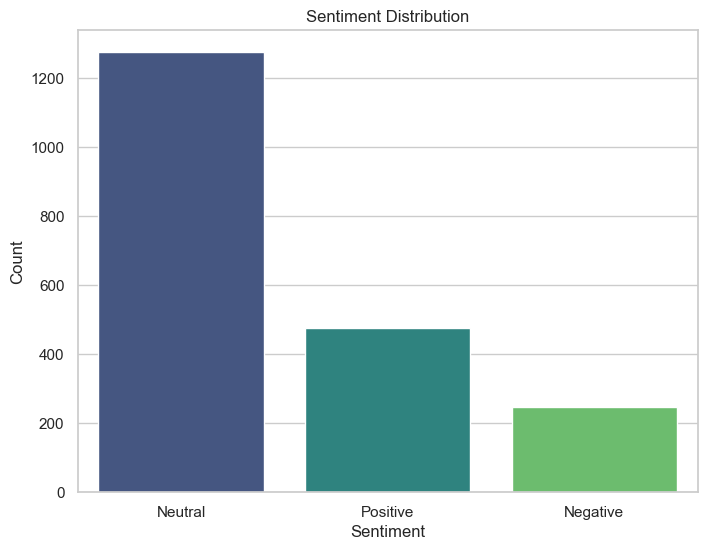

In [13]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [14]:
# Word Cloud (assuming you have a sentiment specific DataFrame)
from wordcloud import WordCloud

# Function to generate word cloud
def generate_word_cloud(sentiment):
    words = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

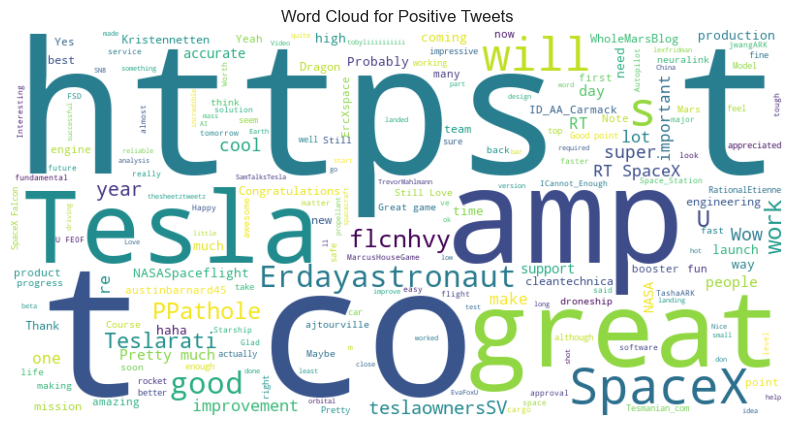

In [15]:
generate_word_cloud('Positive')

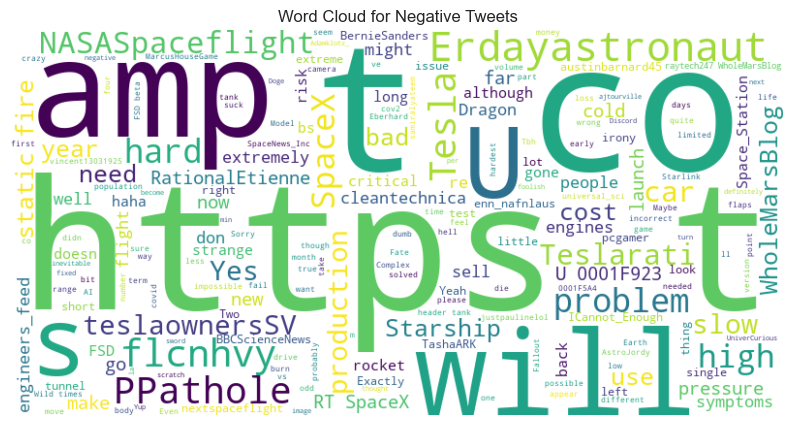

In [16]:
generate_word_cloud('Negative')

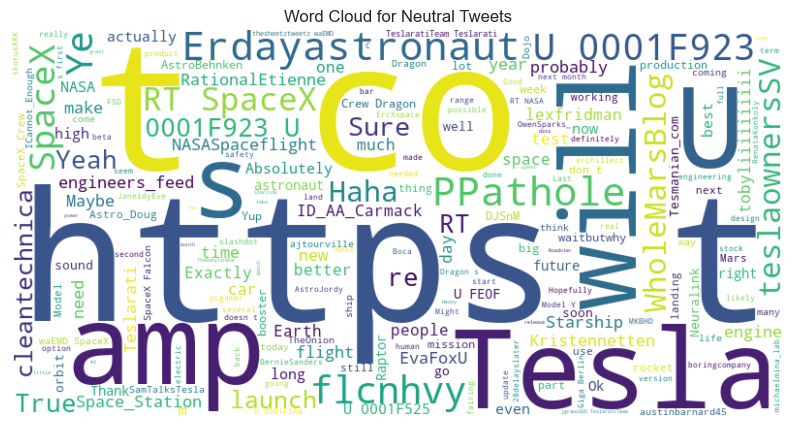

In [17]:
generate_word_cloud('Neutral')